In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers


In [2]:
def make_dataset(data, window_size):
    dataset = []
    for i in range(len(data) - window_size):
        dataset.append(np.array(data.iloc[i:i+window_size+1]))
    return np.array(dataset)

In [3]:
def error_rate(label, prediction, ft_len, forecast_len):
    error_avg = 0
    ft_len = ft_len-1
    for i in range(forecast_len):
        error = abs((label[ft_len+i,0,0] - prediction[ft_len,i,0])/label[ft_len+i,0,0] * 100)
        print('num',i,error,'actual',label[ft_len+i,0,0],'prediction',predictions[ft_len,i,0])
        error_avg = error_avg + error
    error_avg = error_avg/forecast_len
    return error_avg

In [4]:
forecasting = 20
window_size = 19

In [5]:
df = pd.read_csv('trainset/J0003_0024_0222_20110307012737_cell_1.csv', encoding='utf8')
df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,1,0.259,2.23,-20
1,2011.3.7 18:29,1,0.260,2.23,-20
2,2011.3.8 6:29,1,0.259,2.23,-20
3,2011.3.8 18:29,1,0.259,2.23,-20
4,2011.3.9 6:29,1,0.259,2.23,-20
...,...,...,...,...,...
254,2011.8.30 5:28,1,0.301,2.23,-20
255,2011.8.30 17:28,1,0.301,2.23,-20
256,2011.8.31 5:28,1,0.302,2.23,-20
257,2011.8.31 16:09,1,0.300,2.23,-20


In [6]:
df = df.loc[:,['Resistance']]
df

,Resistance
0,0.259
1,0.260
2,0.259
3,0.259
4,0.259
...,...
254,0.301
255,0.301
256,0.302
257,0.300


<AxesSubplot:>

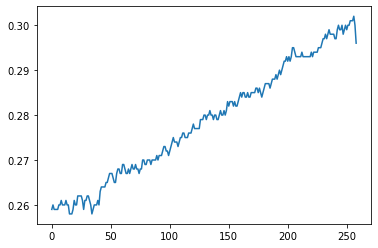

In [7]:
df['Resistance'].plot()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Resistance']
df_scaled = scaler.fit_transform(df)

#df_scaled = pd.DataFrame(df_scaled)
#df_scaled.columns = scale_cols

df_scaled

array([[0.02272727],
       [0.04545455],
       [0.02272727],
       [0.02272727],
       [0.02272727],
       [0.02272727],
       [0.04545455],
       [0.04545455],
       [0.06818182],
       [0.04545455],
       [0.04545455],
       [0.04545455],
       [0.06818182],
       [0.04545455],
       [0.04545455],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02272727],
       [0.06818182],
       [0.04545455],
       [0.04545455],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.06818182],
       [0.02272727],
       [0.06818182],
       [0.06818182],
       [0.09090909],
       [0.09090909],
       [0.06818182],
       [0.04545455],
       [0.        ],
       [0.02272727],
       [0.04545455],
       [0.04545455],
       [0.04545455],
       [0.06818182],
       [0.04545455],
       [0.11363636],
       [0.13636364],
       [0.13636364],
       [0.13636364],
       [0.13636364],
       [0.15909091],
       [0.159

In [9]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Resistance']

In [10]:
df_scaled

,Resistance
0,0.022727
1,0.045455
2,0.022727
3,0.022727
4,0.022727
...,...
254,0.977273
255,0.977273
256,1.000000
257,0.954545


In [11]:
df_scaled_train = df_scaled.loc[:200,]
df_scaled_test = df_scaled.loc[200:,]

df_scaled_train

,Resistance
0,0.022727
1,0.045455
2,0.022727
3,0.022727
4,0.022727
...,...
196,0.750000
197,0.772727
198,0.772727
199,0.795455


In [12]:
ds_train = make_dataset(df_scaled_train,window_size)
ds_train

array([[[0.02272727],
        [0.04545455],
        [0.02272727],
        ...,
        [0.        ],
        [0.02272727],
        [0.06818182]],

       [[0.04545455],
        [0.02272727],
        [0.02272727],
        ...,
        [0.02272727],
        [0.06818182],
        [0.04545455]],

       [[0.02272727],
        [0.02272727],
        [0.02272727],
        ...,
        [0.06818182],
        [0.04545455],
        [0.04545455]],

       ...,

       [[0.61363636],
        [0.63636364],
        [0.65909091],
        ...,
        [0.75      ],
        [0.77272727],
        [0.77272727]],

       [[0.63636364],
        [0.65909091],
        [0.65909091],
        ...,
        [0.77272727],
        [0.77272727],
        [0.79545455]],

       [[0.65909091],
        [0.65909091],
        [0.65909091],
        ...,
        [0.77272727],
        [0.79545455],
        [0.77272727]]])

In [13]:
ds_test = make_dataset(df_scaled_test,window_size)
ds_test

array([[[0.77272727],
        [0.79545455],
        [0.77272727],
        [0.79545455],
        [0.84090909],
        [0.84090909],
        [0.81818182],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.81818182],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455]],

       [[0.79545455],
        [0.77272727],
        [0.79545455],
        [0.84090909],
        [0.84090909],
        [0.81818182],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.81818182],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.81818182]],

       [[0.77272727],
        [0.79545455],
        [0.84090909],
        [0.84090909],
        [0.81818182],
      

In [14]:
x_train = ds_train[:, :window_size,:]
x_train

array([[[0.02272727],
        [0.04545455],
        [0.02272727],
        ...,
        [0.        ],
        [0.        ],
        [0.02272727]],

       [[0.04545455],
        [0.02272727],
        [0.02272727],
        ...,
        [0.        ],
        [0.02272727],
        [0.06818182]],

       [[0.02272727],
        [0.02272727],
        [0.02272727],
        ...,
        [0.02272727],
        [0.06818182],
        [0.04545455]],

       ...,

       [[0.61363636],
        [0.63636364],
        [0.65909091],
        ...,
        [0.72727273],
        [0.75      ],
        [0.77272727]],

       [[0.63636364],
        [0.65909091],
        [0.65909091],
        ...,
        [0.75      ],
        [0.77272727],
        [0.77272727]],

       [[0.65909091],
        [0.65909091],
        [0.65909091],
        ...,
        [0.77272727],
        [0.77272727],
        [0.79545455]]])

In [15]:
y_train = ds_train[:, window_size, :]
y_train

array([[0.06818182],
       [0.04545455],
       [0.04545455],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.06818182],
       [0.02272727],
       [0.06818182],
       [0.06818182],
       [0.09090909],
       [0.09090909],
       [0.06818182],
       [0.04545455],
       [0.        ],
       [0.02272727],
       [0.04545455],
       [0.04545455],
       [0.04545455],
       [0.06818182],
       [0.04545455],
       [0.11363636],
       [0.13636364],
       [0.13636364],
       [0.13636364],
       [0.13636364],
       [0.15909091],
       [0.15909091],
       [0.18181818],
       [0.20454545],
       [0.20454545],
       [0.20454545],
       [0.18181818],
       [0.15909091],
       [0.15909091],
       [0.20454545],
       [0.22727273],
       [0.22727273],
       [0.20454545],
       [0.20454545],
       [0.25      ],
       [0.25      ],
       [0.22727273],
       [0.20454545],
       [0.20454545],
       [0.22727273],
       [0.204

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(64, 
               activation='relu', 
               return_sequences=False)
          )
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1))

In [17]:
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(lr=0.001), metrics=[tf.metrics.MeanAbsoluteError()])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('models/', '210625_checkpoint.h5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [18]:
h = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=4)

Epoch 1/100
46/46 [==============================] - 2s 5ms/step - loss: 0.0700 - mean_absolute_error: 0.2063
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0784
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0423
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0468
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0438
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0399
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0436
Epoch 8/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0428
Epoch 9/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0409
Epoch 10/1

46/46 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0297
Epoch 75/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0366
Epoch 76/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0408
Epoch 77/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0337
Epoch 78/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0333
Epoch 79/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0329
Epoch 80/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0296
Epoch 81/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0368
Epoch 82/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0387
Epoch 83/100
4

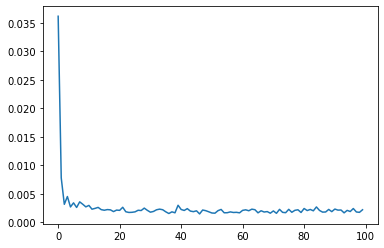

In [19]:
plt.plot(h.history['loss'])
plt.show()

In [20]:
pred_count = 50

In [21]:
x_test = ds_test[:,:window_size,:]
y_test = ds_test[:, window_size,:]

seq_in = x_test[0,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[0,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    print('------',i,'------')
    print(sample_in)
    sample_in = np.reshape(sample_in, (1,window_size,1))
    pred_out = model.predict(sample_in)
    print('pred----------')
    print(pred_out[0])
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    print('-----seqin-----')
    print(seq_in)
    print('------seqout------')
    print(seq_out)
    seq_in.pop(0)


------ 0 ------
[[0.77272727]
 [0.79545455]
 [0.77272727]
 [0.79545455]
 [0.84090909]
 [0.84090909]
 [0.81818182]
 [0.79545455]
 [0.79545455]
 [0.79545455]
 [0.79545455]
 [0.79545455]
 [0.81818182]
 [0.79545455]
 [0.79545455]
 [0.79545455]
 [0.79545455]
 [0.79545455]
 [0.79545455]]
pred----------
[0.7977874]
-----seqin-----
[[0.7727272727272725], [0.7954545454545459], [0.7727272727272725], [0.7954545454545459], [0.8409090909090908], [0.8409090909090908], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7977874279022217]]
------seqout------
[[0.7727272727272725], [0.7954545454545459], [0.7727272727272725], [0.7954545454545459], [0.8409090909090908], [0.8409090909090908], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.795454545454

pred----------
[0.8065132]
-----seqin-----
[[0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7977874279022217], [0.7990624904632568], [0.8003201484680176], [0.8015691041946411], [0.802812397480011], [0.8040507435798645], [0.8052842617034912], [0.8065131902694702]]
------seqout------
[[0.7727272727272725], [0.7954545454545459], [0.7727272727272725], [0.7954545454545459], [0.8409090909090908], [0.8409090909090908], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7977874279022217], [0.7990624904632568], [0.8003201484680176], [0.8015691041

pred----------
[0.8137917]
-----seqin-----
[[0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7977874279022217], [0.7990624904632568], [0.8003201484680176], [0.8015691041946411], [0.802812397480011], [0.8040507435798645], [0.8052842617034912], [0.8065131902694702], [0.8077377080917358], [0.8089575171470642], [0.8101728558540344], [0.8113836646080017], [0.8125900030136108], [0.8137916922569275]]
------seqout------
[[0.7727272727272725], [0.7954545454545459], [0.7727272727272725], [0.7954545454545459], [0.8409090909090908], [0.8409090909090908], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7977874279022217], [0.7990624904632568], [0.8003201484680176], [0.8015691041

pred----------
[0.8220777]
-----seqin-----
[[0.7990624904632568], [0.8003201484680176], [0.8015691041946411], [0.802812397480011], [0.8040507435798645], [0.8052842617034912], [0.8065131902694702], [0.8077377080917358], [0.8089575171470642], [0.8101728558540344], [0.8113836646080017], [0.8125900030136108], [0.8137916922569275], [0.8149887919425964], [0.816181480884552], [0.8173696398735046], [0.8185532689094543], [0.8197324872016907], [0.8209073543548584], [0.8220776915550232]]
------seqout------
[[0.7727272727272725], [0.7954545454545459], [0.7727272727272725], [0.7954545454545459], [0.8409090909090908], [0.8409090909090908], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7977874279022217], [0.7990624904632568], [0.8003201484680176], [0.80156910419

pred----------
[0.8278632]
-----seqin-----
[[0.8052842617034912], [0.8065131902694702], [0.8077377080917358], [0.8089575171470642], [0.8101728558540344], [0.8113836646080017], [0.8125900030136108], [0.8137916922569275], [0.8149887919425964], [0.816181480884552], [0.8173696398735046], [0.8185532689094543], [0.8197324872016907], [0.8209073543548584], [0.8220776915550232], [0.8232436180114746], [0.8244050145149231], [0.8255621790885925], [0.8267148733139038], [0.8278632164001465]]
------seqout------
[[0.7727272727272725], [0.7954545454545459], [0.7727272727272725], [0.7954545454545459], [0.8409090909090908], [0.8409090909090908], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7977874279022217], [0.7990624904632568], [0.8003201484680176], [0.8015691041

[0.8368945]
-----seqin-----
[[0.8149887919425964], [0.816181480884552], [0.8173696398735046], [0.8185532689094543], [0.8197324872016907], [0.8209073543548584], [0.8220776915550232], [0.8232436180114746], [0.8244050145149231], [0.8255621790885925], [0.8267148733139038], [0.8278632164001465], [0.8290072679519653], [0.8301469087600708], [0.8312822580337524], [0.832413375377655], [0.8335400223731995], [0.8346624970436096], [0.8357807397842407], [0.8368945121765137]]
------seqout------
[[0.7727272727272725], [0.7954545454545459], [0.7727272727272725], [0.7954545454545459], [0.8409090909090908], [0.8409090909090908], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7977874279022217], [0.7990624904632568], [0.8003201484680176], [0.8015691041946411], [0.8028

pred----------
[0.84565413]
-----seqin-----
[[0.8244050145149231], [0.8255621790885925], [0.8267148733139038], [0.8278632164001465], [0.8290072679519653], [0.8301469087600708], [0.8312822580337524], [0.832413375377655], [0.8335400223731995], [0.8346624970436096], [0.8357807397842407], [0.8368945121765137], [0.8380042314529419], [0.8391097187995911], [0.8402108550071716], [0.8413078784942627], [0.8424007296562195], [0.8434892892837524], [0.8445738554000854], [0.8456541299819946]]
------seqout------
[[0.7727272727272725], [0.7954545454545459], [0.7727272727272725], [0.7954545454545459], [0.8409090909090908], [0.8409090909090908], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.7977874279022217], [0.7990624904632568], [0.8003201484680176], [0.801569104

[[0.83014691]
 [0.83128226]
 [0.83241338]
 [0.83354002]
 [0.8346625 ]
 [0.83578074]
 [0.83689451]
 [0.83800423]
 [0.83910972]
 [0.84021086]
 [0.84130788]
 [0.84240073]
 [0.84348929]
 [0.84457386]
 [0.84565413]
 [0.84673029]
 [0.84780228]
 [0.84887034]
 [0.84993404]]
pred----------
[0.8509938]
-----seqin-----
[[0.8301469087600708], [0.8312822580337524], [0.832413375377655], [0.8335400223731995], [0.8346624970436096], [0.8357807397842407], [0.8368945121765137], [0.8380042314529419], [0.8391097187995911], [0.8402108550071716], [0.8413078784942627], [0.8424007296562195], [0.8434892892837524], [0.8445738554000854], [0.8456541299819946], [0.8467302918434143], [0.8478022813796997], [0.8488703370094299], [0.8499340415000916], [0.850993812084198]]
------seqout------
[[0.7727272727272725], [0.7954545454545459], [0.7727272727272725], [0.7954545454545459], [0.8409090909090908], [0.8409090909090908], [0.8181818181818183], [0.7954545454545459], [0.7954545454545459], [0.7954545454545459], [0.79545454

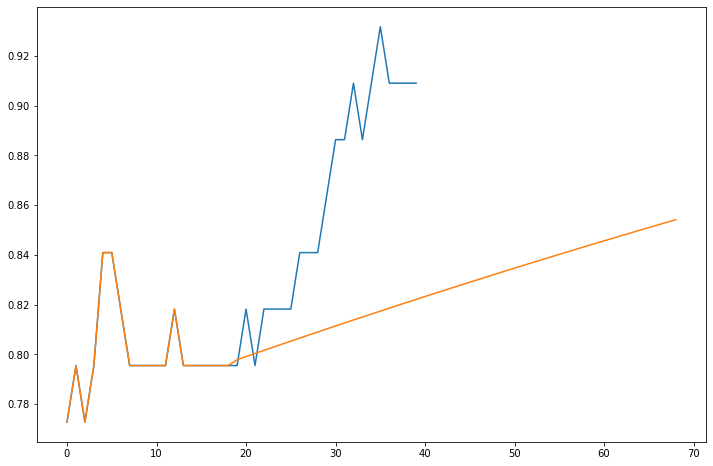

In [22]:
plt.figure(figsize=(12,8))
plt.plot(x_test[:,0,:])
plt.plot(seq_out)
plt.show()

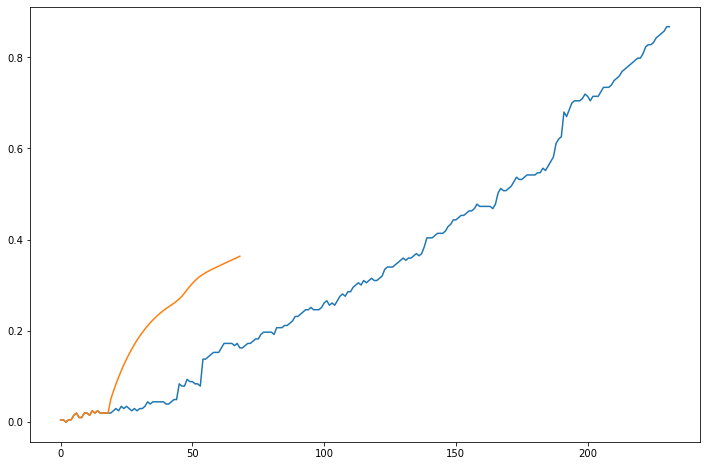

In [23]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_23.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[0,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[0,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,1))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)


plt.figure(figsize=(12,8))
plt.plot(x_test[:,0,:])
plt.plot(seq_out)
plt.show()

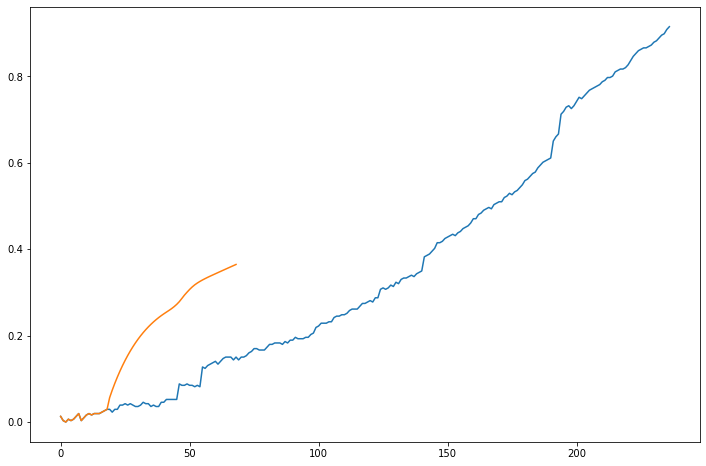

In [24]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_06.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[0,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[0,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,1))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)


plt.figure(figsize=(12,8))
plt.plot(x_test[:,0,:])
plt.plot(seq_out)
plt.show()